Olá, 

Meu nome é Ramon. Fico feliz em revisar seu projeto. Ao ao longo do texto farei algumas observações sobre melhorias no código e também farei comentários sobre suas percepções sobre o assunto. Estarei aberto a feedbacks e discussões sobre o tema.

**Peço que mantenha e não altere os comentários que eu fizer por aqui para que possamos nos localizar posteriormente, ok?**

Mais uma coisa, vamos utilizar um código de cores para você entender os meus feedbacks no seu notebook. Funciona assim:

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Sucesso. Tudo foi feito corretamente.
</div>

<div class="alert alert-block alert-warning">
<b>Comentário do revisor: </b> <a class="tocSkip"></a>

Alerta não crítco, mas que pode ser corrigido para melhoria geral no seu código/análise
</div>

<div class="alert alert-block alert-danger">

<b>Comentário do revisor: </b> <a class="tocSkip"></a>
    
Erro que precisa ser consertado, caso contrário seu projeto **não** será aceito.
</div>


Você pode me responder usando isso:
<div class="alert alert-block alert-info">
<b>Resposta do Aluno.</b> <a class="tocSkip"></a>
</div>

###

<div class="alert alert-block alert-success">
<b>Comentário Geral do Revisor</b> <a class="tocSkip"></a>

Obrigado por enviar seu projeto. 
    
Parabéns, você fez um bom trabalho.

Como pontos fortes do projeto, destaco:
- Código simples e eficiente (sem loop desnecessário)
- Uso adequado dos recursos da lição

    
<span class="text-danger">Porém, há espaço para melhorias conforme os itens apontados anteriormente. Destaco os  pontos a seguir: </span>
 * <span class="text-danger"> X </span>


Portanto, sugiro que você corrija os pontos indicados.
    
Se você tiver alguma dúvida sobre de algo que você não tenha entendido, sinta-se à vontade para perguntar ao tutor ou deixar um comentário em **azul** para que, na próxima iteração, eu possa responder.

Conte conosco. Lembre-se de que você pode tirar dúvidas com revisores usando os comentários ou buscar ajuda de um tutor.
Bom trabalho.
</div>


<div class="alert alert-block alert-info">
<b>Não veio nenhum item de  melhoria. Nos pontos a seguir veio: um "X". E não veio nenhum item em vermelho no corpo do projeto.</b> <a class="tocSkip"></a>
</div>

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

A plataforma não salvou. Deu erro várias vezes quando tentava salvar. Peço desculpas. Não consigo ver a saída do notebook. Qual é o valor da métrica? Além disso, a etapa EDA está boa mas muitas imagens são exibidas. Deixa o notebook lento. Em resumo, preciso ver output do treinamento (loss, métrica) e métrica no teste. 
</div>

<div class="alert alert-block alert-info">
<b>A métrica MAE foi igual 7.51. Fiz a alteração para imprimir somente 6 idades de amostra.</b> <a class="tocSkip"></a>
</div>

<div class="alert alert-block alert-info">
<b>Novamente não teve nenhum comentário novo. O projeto só foi reprovado. O que preciso alterar? O que não está correto?</b> <a class="tocSkip"></a>
</div>

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

A plataforma não salvou novamente. Eu preciso que você apresente o log do treinamento conforme o checklist "A saída do treinamento do modelo foi copiada para o notebook final". Além disso, você precisa apresentar o log/output que me permita ver a métrica final do modelo. Você está apenas informando. Qual código gerou? Qual saída?
</div>

## Inicialização

## Carregar os dados

O conjunto de dados está armazenado na pasta `/datasets/faces/`, lá você encontra 
- A pasta `final_files` com 7,6k fotos
- O arquivo `labels.csv` com rótulos, com duas colunas: `file_name` e `real_age`

Dado que o número de arquivos de imagem é bastante alto, é aconselhável evitar a leitura de todos de uma vez, o que consumiria muito recursos computacionais. Recomendamos que você crie um gerador com o ImageDataGenerator. Este método foi explicado no Capítulo 3, Lição 7 deste curso.

O arquivo de etiqueta pode ser carregado como um arquivo CSV usual.

In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pandas as pd
import numpy as np
import collections
import matplotlib.pyplot as plt


In [2]:
label_path = '/datasets/faces/labels.csv'
labels = pd.read_csv(label_path)

In [3]:
datagen = ImageDataGenerator(rescale=1/255)

In [4]:
target_size = (150,150)
image_path = '/datasets/faces/final_files/'
train_datagen_flow = datagen.flow_from_dataframe(dataframe=labels,
                                                 directory=image_path,
                                                 target_size=target_size,
                                                 batch_size=16,
                                                 class_mode='raw',
                                                 x_col = 'file_name',
                                                 y_col = 'real_age',
                                                 seed=12345
                                                )


Found 7591 validated image filenames.


## EDA

Temos 7591 imagens

### Encontrando 

In [ ]:
print(labels.head())

In [ ]:
print(labels.describe())

- A média das idaades é de 31 anos e a mediana 29 anos.
- 75% das pessoas tem menos de 41 anos
- A idade máxima é de 100 anos

In [ ]:
labels['real_age'].hist();

- Temos uma distribuição assimétrica direita
- A maior parte das idades está entre 0 e 40 anos


<div class="alert alert-block alert-warning">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Assimetria é à direita a meu ver
</div>

<div class="alert alert-block alert-info">
<b>Correto. Corrigido.</b> <a class="tocSkip"></a>
</div>

In [5]:
#criar uma função para aramazenar as imagens por idade
#Armazenar 5 imagens por idade
#Tentar no máximo 1000 vezes conseguir 5 imagens, caso não tenha 5 imagens ir para a próxima idade
def collect_images_by_age(data_generator, max_iterations=1000):
    #criar o dicionário que irá armazenar as imagens
    images_by_age = collections.defaultdict(list)
   
    #loop com no máximo 1000 iterações
    for _ in range(max_iterations):
        #armazenar as imagens e idades em images e ages
        images, ages = data_generator.next()
        #iterar sobre cadad idade e imagem juntos
        for img, age in zip(images, ages):
            #verificar se já temos 5 imagens para a idade em iteração
            if len(images_by_age[age]) < 5:
                #se for menor que 5 imagens apendar a img
                images_by_age[age].append(img)
        

        if all(len(imgs) >= 5 for imgs in images_by_age.values()):
            break
    
    return images_by_age

def print_images_by_age(images_by_age):
    for age in images_by_age:
        if len(images_by_age[age]) < 5:
            print(f"Não foi possível obter 5 imagens para a idade {age}. Total disponível: {len(images_by_age[age])}")

def display_images(images_by_age):
    # Iterar apenas sobre as primeiras 6 idades
    for age, imgs in list(images_by_age.items())[:6]:
        fig, axes = plt.subplots(1, 5, figsize=(15, 3))
        fig.suptitle(f"Idade: {age}")
        for img, ax in zip(imgs[:5], axes):
            ax.imshow(img)
            ax.axis('off')
        plt.show()


Coletando 5 imagens por idade

In [6]:
images_by_age = collect_images_by_age(train_datagen_flow)

Verificando as idades que tem menos de 5 imagens

In [7]:
print_images_by_age(images_by_age)

Não foi possível obter 5 imagens para a idade 95. Total disponível: 4
Não foi possível obter 5 imagens para a idade 96. Total disponível: 4
Não foi possível obter 5 imagens para a idade 100. Total disponível: 2
Não foi possível obter 5 imagens para a idade 91. Total disponível: 2
Não foi possível obter 5 imagens para a idade 93. Total disponível: 2
Não foi possível obter 5 imagens para a idade 97. Total disponível: 2


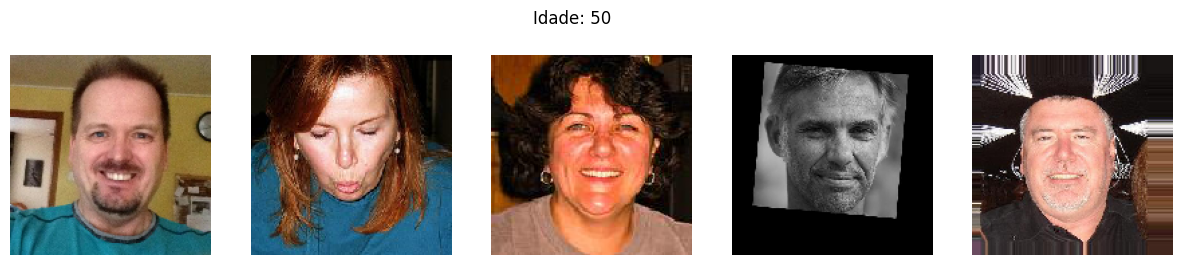

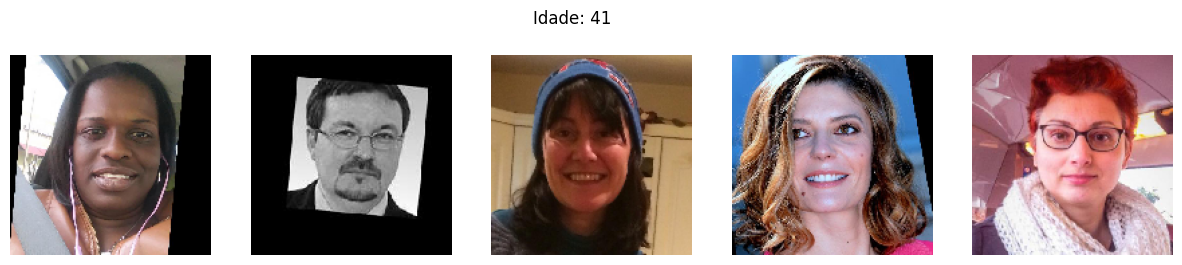

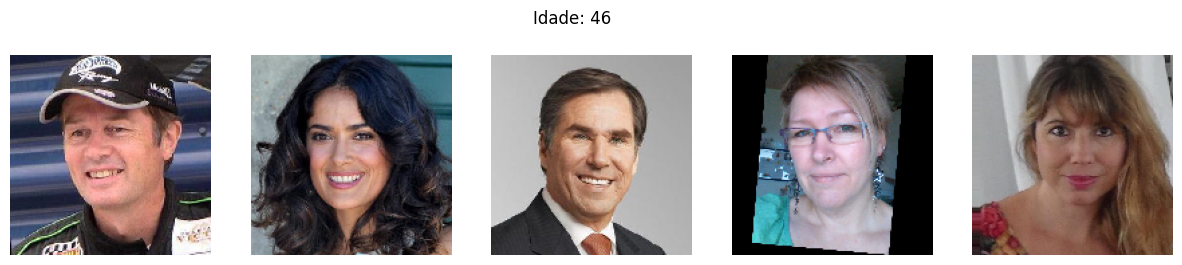

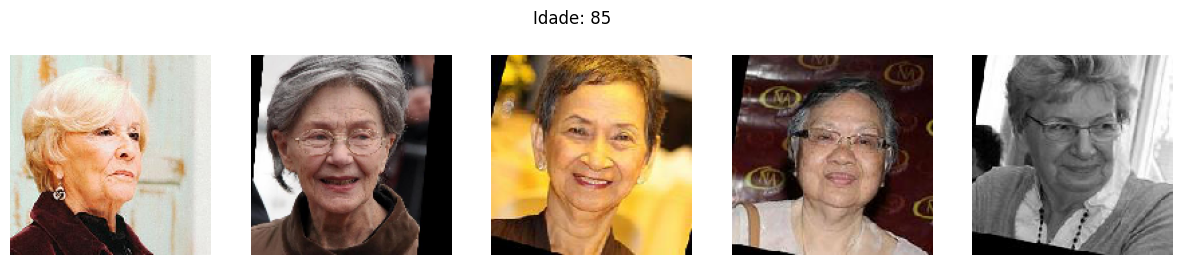

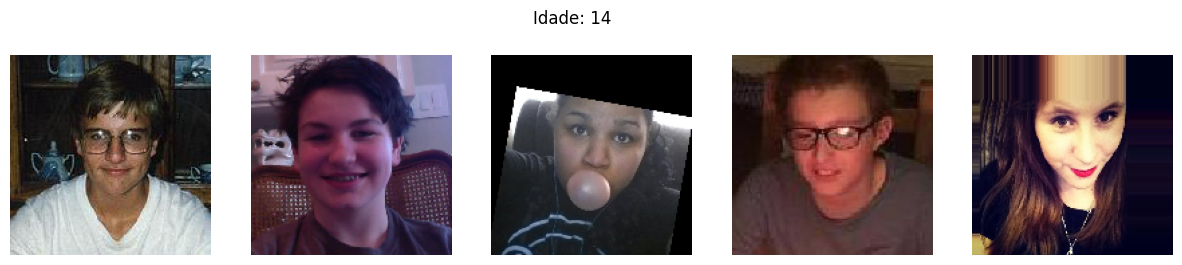

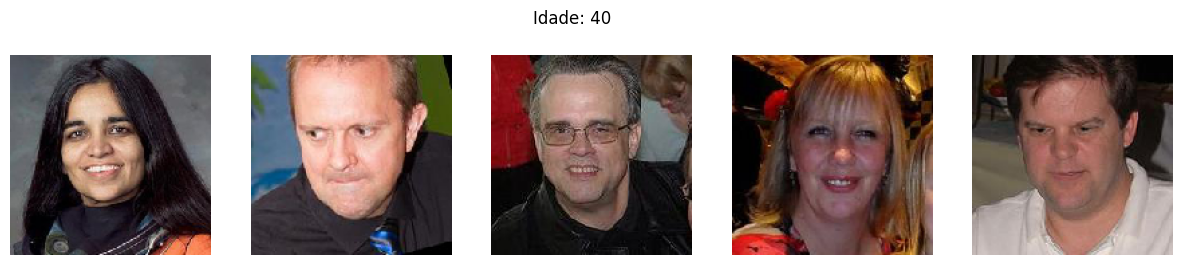

In [8]:
display_images(images_by_age)

Imprimindo as fotos de 6 idades como exemplo

- Temos imagens repetidas para algumas idades
- Na idade de 6 anos temos uma mulher que evidentemente não tem 6 anos

## Modelagem

Defina as funções necessárias para treinar seu modelo na plataforma GPU e construa um único script contendo todas elas junto com a seção de inicialização.
Para facilitar essa tarefa, você pode defini-las neste notebook e executar um código pronto na próxima seção para compor o script automaticamente.
As definições abaixo também serão verificadas pelos revisores do projeto, para que possam entender como você construiu o modelo.

In [ ]:
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet import ResNet50
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [4]:
def load_train(path):
    
    """
    Carrega a parte de treinamento do conjunto de dados a partir do caminho
    """
    
    labels = pd.read_csv(path + 'labels.csv')
    train_datagen = ImageDataGenerator(
        validation_split=0.25,
        horizontal_flip=True,
        rescale=1./255)
    train_gen_flow = train_datagen.flow_from_dataframe(
        dataframe=labels,
        directory=path + 'final_files/',
        x_col='file_name',
        y_col='real_age',
        target_size=(224, 224),
        batch_size=16,
        class_mode='raw',
        subset='training',
        seed=12345)

    return train_gen_flow

In [6]:
def load_test(path):
    
    """
    Carrega a parte de validação/teste do conjunto de dados a partir do caminho
    """
    
    labels = pd.read_csv(path + 'labels.csv')
    test_datagen = ImageDataGenerator(
        validation_split=0.25,
        rescale=1./255)
    test_gen_flow = test_datagen.flow_from_dataframe(
        dataframe=labels,
        directory=path + 'final_files/',
        x_col='file_name',
        y_col='real_age',
        target_size=(224, 224),
        batch_size=16,
        class_mode='raw',
        subset='validation',
        seed=12345)

    return test_gen_flow

In [9]:
def create_model(input_shape):
    
    """
    Define o modelo
    """
    
    backbone = ResNet50(weights='imagenet', 
                        input_shape=input_shape,
                        include_top=False)

    model = Sequential()
    model.add(backbone)
    model.add(GlobalAveragePooling2D())
    model.add(Dense(1, activation='relu'))

    optimizer = Adam(lr=0.0005)
    model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

    return model

In [7]:
def train_model(model, train_data, test_data, batch_size=None, epochs=20,
                steps_per_epoch=None, validation_steps=None):

    """
    Treina o modelo de acordo com os parâmetros
    """
    
    if steps_per_epoch is None:
        steps_per_epoch = len(train_data)
    if validation_steps is None:
        validation_steps = len(test_data)

    model.fit(train_data, 
              validation_data=test_data,
              batch_size=batch_size, epochs=epochs,
              steps_per_epoch=steps_per_epoch,
              validation_steps=validation_steps,
              verbose=2)

    return model

### Preparar o Script para execução na plataforma GPU

Dado que você definiu as funções necessárias, você pode compor um script para a plataforma GPU, baixá-lo através do menu "Arquivo|Abrir..." e carregá-lo posteriormente para execução na plataforma GPU.

Nota: O script também deve incluir a seção de inicialização. Um exemplo disso é mostrado abaixo.

In [12]:
# preparar um script para ser executado na plataforma GPU
import inspect
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

init_str = """
import pandas as pd

import tensorflow as tf

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam

"""


    
with open('run_model_on_gpu.py', 'w') as f:
    
    f.write(init_str)
    f.write('\n\n')
        
    for fn_name in [load_train, load_test, create_model, train_model]:
        
        src = inspect.getsource(fn_name)
        f.write(src)
        f.write('\n\n')
            



<div class="alert alert-block alert-info">
<b>Este scrip está correto? Eu preciso criar um novo arquivo para subir na plataforma ou é o no jupyter mesmo?</b> <a class="tocSkip"></a>
</div>

### Saída

Coloque a saída da plataforma GPU como uma célula Markdown aqui.

Train for 356 steps, validate for 119 steps  
Epoch 1/20  
2024-07-08 19:31:23.885954: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library   libcublas.so.10  
2024-07-08 19:31:24.945919: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library   libcudnn.so.7  
356/356 - 59s - loss: 222.6541 - mae: 11.4006 - val_loss: 373.3102 - val_mae: 14.4291  
Epoch 2/20  
356/356 - 38s - loss: 139.7226 - mae: 9.0348 - val_loss: 195.4198 - val_mae: 10.9268  
Epoch 3/20  
356/356 - 38s - loss: 114.9413 - mae: 8.2292 - val_loss: 129.1410 - val_mae: 8.6024  
Epoch 4/20 
356/356 - 38s - loss: 98.4431 - mae: 7.6077 - val_loss: 188.0117 - val_mae: 9.9758  
Epoch 5/20  
356/356 - 38s - loss: 82.0026 - mae: 6.9223 - val_loss: 168.4648 - val_mae: 9.7001  
Epoch 6/20  
356/356 - 38s - loss: 69.9074 - mae: 6.4274 - val_loss: 120.3289 - val_mae: 8.4864  
Epoch 7/20  
356/356 - 38s - loss: 60.6344 - mae: 5.9487 - val_loss: 95.6440 - val_mae: 7.4817  
Epoch 8/20  
356/356 - 38s - loss: 48.7764 - mae: 5.3492 - val_loss: 128.4951 - val_mae: 8.4217  
Epoch 9/20  
356/356 - 38s - loss: 39.7591 - mae: 4.8714 - val_loss: 103.9774 - val_mae: 7.6110  
Epoch 10/20  
356/356 - 38s - loss: 38.7228 - mae: 4.7451 - val_loss: 137.9055 - val_mae: 8.6464  
Epoch 11/20  
356/356 - 38s - loss: 32.8723 - mae: 4.4435 - val_loss: 101.8303 - val_mae: 7.7513  
Epoch 12/20  
356/356 - 38s - loss: 28.3289 - mae: 4.1080 - val_loss: 130.4748 - val_mae: 9.0431  
Epoch 13/20  
356/356 - 38s - loss: 27.1525 - mae: 4.0084 - val_loss: 92.4160 - val_mae: 7.4523  
Epoch 14/20  
356/356 - 38s - loss: 23.3343 - mae: 3.7444 - val_loss: 151.6160 - val_mae: 9.3550  
Epoch 15/20  
356/356 - 38s - loss: 22.5830 - mae: 3.6536 - val_loss: 108.7848 - val_mae: 7.9512  
Epoch 16/20  
356/356 - 38s - loss: 20.1300 - mae: 3.4535 - val_loss: 91.4591 - val_mae: 7.3211  
Epoch 17/20  
356/356 - 38s - loss: 18.1582 - mae: 3.3028 - val_loss: 98.1348 - val_mae: 7.3712  
Epoch 18/20  
356/356 - 38s - loss: 17.9211 - mae: 3.2573 - val_loss: 94.4555 - val_mae: 7.5470  
Epoch 19/20  
356/356 - 38s - loss: 17.8752 - mae: 3.2597 - val_loss: 104.8097 - val_mae: 7.6824  
Epoch 20/20  
356/356 - 38s - loss: 17.8011 - mae: 3.2432 - val_loss: 96.9736 - val_mae: 7.5101  
WARNING:tensorflow:sample_weight modes were coerced from  
  ...  
    to  
  ['...']  
119/119 - 9s - loss: 96.9736 - mae: 7.5101  
Test MAE: 7.5101


<div class="alert alert-block alert-info">
<b>Copiado o log do treinamento.</b> <a class="tocSkip"></a>
</div>

## Conclusões

- Tenos um programa que tem um erro de 7 anos de idade, aproximadamente
- Desta maneira ele poderia permitir que um adolescente consiga comprar bebidas alcóolicas
- Assim como não permitiria que um jovem de 18 anos comprasse
- Podemos utilizar o sistema para detecção de idosos para fila preferencial
- Também podemos verificar crianças descacompanhadas dentro da loja


# Checklist

- [ ]  O notebook foi aberto
- [ ]  O código está livre de erros 
- [ ]  As células com código foram organizadas por ordem de execução- [ ]  A análise exploratória dos dados foi realizada 
- [ ]  Os resultados da análise exploratória dos dados são apresentados no caderno final 
- [ ]  O valor EAM do modelo não é superior a 8
- [ ]  O código de treinamento do modelo foi copiado para o notebook final 
- [ ]  A saída do treinamento do modelo foi copiada para o notebook final 
- [ ]  As conclusões foram fornecidas com base nos resultados do treinamento do modelo